In [1]:
# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-28,15:18].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-28,15:25].pkl"
# undersampling_interval = 10

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-29,09:47].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-29,10:58].pkl"
# undersampling_interval = 1


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_[2022-11-29,11:02].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_continuous_[2022-11-29,14:56].pkl"
# undersampling_interval = 1

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_[2022-11-29,15:56].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_continuous_[2022-11-29,16:19].pkl"
# undersampling_interval = 10


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_mock_[2022-12-02,08:57].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,09:17].pkl"
# undersampling_interval = 8


# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,10:13].pkl"
# undersampling_interval = 10

###### Everything above here doesn't have participant indices recorded!



# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_CorreiaNet_continuous_[2022-12-06,10:21].pkl"
# undersampling_interval = 10





# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2022-12-06,10:47].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_20Ensemble_EEGNet_continuous_[2022-12-06,11:46].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianEEGNet_continuous_[2022-12-06,11:54].pkl"
# undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianCorreiaNet_continuous_[2022-12-06,12:24].pkl"
undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_UnbalancedBayesianCorreiaNet_continuous_[2022-12-06,13:03].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Unbalanced20EnsembleEEGNet_continuous_[2022-12-06,15:17].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Balanced20EnsembleCorreiaNet_continuous_[2022-12-06,19:55].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_NoStrideCorreiaNetEnsemble_continuous_[2022-12-07,11:37].pkl"
# undersampling_interval = 10




# test_metrics_path_continuous = "BCI_root/Results/metrics_Proper_EEGNet_continuous_[2022-12-07,12:13].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_5ensembleProper_EEGNet_continuous_[2022-12-07,12:37].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_CrossEntropy5ensembleProper_EEGNet_continuous_[2022-12-07,14:52].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_continuous_[2022-12-08,15:41].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_continuous_[2022-12-08,15:56].pkl" # This one uses the "correct" number of PCAs (expl 99%)
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_continuous_[2022-12-08,18:05].pkl" 
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_600_continuous_[2022-12-08,18:09].pkl" 
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_600x600_continuous_[2022-12-08,18:15].pkl" 
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_600x600_continuous_[2022-12-09,09:38].pkl" # actualy 300 x 600 
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_ProperEEGNetEnsembleWithPreWindow_continuous_[2022-12-09,10:37].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_600x600LDA_continuous_[2022-12-09,11:06].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_600x600ProperEEGEnsemble_continuous_[2022-12-09,12:13].pkl"
# undersampling_interval = 10


test_metrics_path_continuous = "BCI_root/Results/metrics_TorchEEGNet5Ensemble_continuous_[2022-12-09,14:22].pkl"
undersampling_interval = 10




# test_metrics_path_continuous = "BCI_root/Results/metrics_FBCNet5Ensemble_continuous_[2022-12-12,08:57].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_UnbalancedFBCNet5Ensemble_continuous_[2022-12-12,09:21].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_LargeTorchEEGEnsemble_continuous_[2022-12-12,14:16].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Causal_continuous_[2022-12-15,17:53].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_Causal_continuous_[2022-12-19,10:34].pkl"  # This one uses ICA
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_ICA_OnTestData_continuous_[2022-12-19,11:23].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_NoICA_LDA_continuous_[2022-12-19,11:31].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Small_ICA_LDA_continuous_[2022-12-19,11:40].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Test_ICA_Pre_Bandpass_continuous_[2022-12-19,12:19].pkl" # This is aggressive on the ICA
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Test_ICA_Pre_Bandpass_CNN_continuous_[2022-12-19,12:34].pkl" # This is aggressive on the ICA
# undersampling_interval = 10


test_metrics_path_continuous = "BCI_root/Results/metrics_Test_Interpolate_HEOG_continuous_[2022-12-19,15:27].pkl" # This is aggressive on the ICA
undersampling_interval = 10


test_metrics_path_continuous = "BCI_root/Results/metrics_Test_Interpolate_HEOG_CNN_continuous_[2022-12-19,15:40].pkl" # This is aggressive on the ICA
undersampling_interval = 10



test_metrics_path_continuous = "BCI_root/Results/metrics_HEOG_LDA_Fair_Test_continuous_[2022-12-19,16:05].pkl" # This is aggressive on the ICA
undersampling_interval = 10

In [2]:
from src.data.util import open_file_pickle
import torch
import numpy as np
from src.util.util import milliseconds_to_samples, samples_to_milliseconds
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataclasses import fields
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# test_metrics = open_file_pickle(test_metrics_path)
test_metrics_continuous = open_file_pickle(test_metrics_path_continuous)

In [4]:
len(test_metrics_continuous.y_predicted)

560463

(560462,)
torch.Size([560462])
1.0
[0.]
0.0
0.0 0.0
(560461,)
torch.Size([560461])
1.0
[-0.]
0.0
0.0 0.0
(560460,)
torch.Size([560460])
1.0
[0.]
0.0
0.0 0.0
(560459,)
torch.Size([560459])
1.0
[-0.]
0.0
0.0 0.0


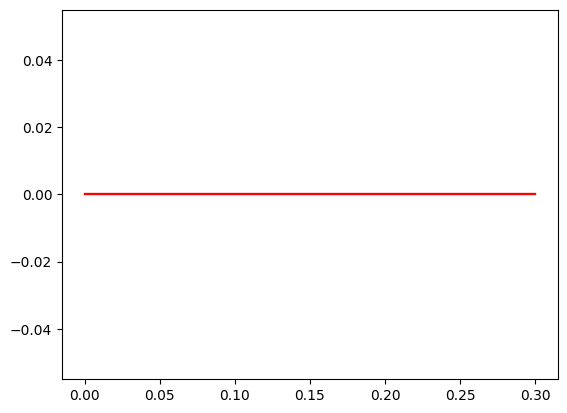

In [5]:
best_score = -1
best_i = 1
best_reg = None
decorrelate_variance = False


for i in range(1, 5):
    n = i

    y = test_metrics_continuous.y_variance[n:]
    x = np.abs(np.diff(test_metrics_continuous.y_predicted, n=n))
    print(x.shape)
    print(y.shape)
    m, b = np.polyfit(x, y, 1)

    plt.plot([0, 0.3], m*np.array([0, 0.3])+b, color='red')
    

    reg = LinearRegression().fit(x.reshape(-1, 1), y)
    
    score = reg.score(x.reshape(-1, 1), y)
    
    if decorrelate_variance:
        pred_variances = reg.predict(np.abs(np.diff(test_metrics_continuous.y_predicted, n=i, prepend=[0] * i)).reshape(-1, 1))
        test_metrics_continuous.y_variance = test_metrics_continuous.y_variance - pred_variances + pred_variances.mean()
    
    if score > best_score:
        best_score = score
        best_i = i
        best_reg = reg
    
    print(score)
    print(reg.coef_)
    print(reg.intercept_)
    print(m, b)


In [6]:
best_score

1.0

In [7]:
for ms in range(10, 100, 10):

    truncate = -(test_metrics_continuous.y_predicted.shape[0] % milliseconds_to_samples(ms))

    pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(-1, milliseconds_to_samples(ms))
    # pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(milliseconds_to_samples(ms), -1)

    print(f"Average variance per {ms}ms is {pred_intervals.var(axis=1).mean()}")
    # print(f"Average variance per {ms}ms is {pred_intervals.var(axis=0).mean()}")

for ms in range(100, 1000, 100):

    truncate = -(test_metrics_continuous.y_predicted.shape[0] % milliseconds_to_samples(ms))

    pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(-1, milliseconds_to_samples(ms))
    # pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(milliseconds_to_samples(ms), -1)

    print(f"Average variance per {ms}ms is {pred_intervals.var(axis=1).mean()}")
    # print(f"Average variance per {ms}ms is {pred_intervals.var(axis=0).mean()}")



Average variance per 10ms is 0.020793336708998866
Average variance per 20ms is 0.029873748894738855
Average variance per 30ms is 0.03669136603329659
Average variance per 40ms is 0.041130563818895134
Average variance per 50ms is 0.043903055097865545
Average variance per 60ms is 0.045330986966586155
Average variance per 70ms is 0.046067959509523464
Average variance per 80ms is 0.046462956518217656
Average variance per 90ms is 0.046636685897428774
Average variance per 100ms is 0.046691775628905245
Average variance per 200ms is 0.046874048832279476
Average variance per 300ms is 0.04687252145757002
Average variance per 400ms is 0.04685898745107678
Average variance per 500ms is 0.046852120444255886
Average variance per 600ms is 0.046852154814021586
Average variance per 700ms is 0.046843369627674054
Average variance per 800ms is 0.04684067279389882
Average variance per 900ms is 0.04683455535254375


In [8]:
test_metrics_continuous.y_variance

tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)

In [9]:
test_metrics_continuous.y_subj_idx.shape

torch.Size([560463])

In [10]:
print(test_metrics_continuous.y_in_distribution.sum())


tensor(2673)


In [11]:
test_metrics_continuous.y_predicted

tensor([0.2867, 0.1979, 0.2893,  ..., 0.5886, 0.5750, 0.5611],
       dtype=torch.float64)

In [12]:
test_metrics_continuous.y_variance.shape

torch.Size([560463])

In [13]:
for i in range(1, 7):
    print((test_metrics_continuous.y_subj_idx == i).sum())
print(test_metrics_continuous.y_in_distribution.sum())
print(test_metrics_continuous.y_predicted.shape)

tensor(93239)
tensor(95134)
tensor(93753)
tensor(92318)
tensor(93035)
tensor(92984)
tensor(2673)
torch.Size([560463])


In [14]:
continues_true_rate = 1

if continues_true_rate > 1:
    test_metrics_continuous.y_predicted = test_metrics_continuous.y_predicted.reshape(-1, continues_true_rate).max(axis=1).values
    test_metrics_continuous.y_true = test_metrics_continuous.y_true.reshape(-1, continues_true_rate).min(axis=1).values
    test_metrics_continuous.y_in_distribution = test_metrics_continuous.y_in_distribution.reshape(-1, continues_true_rate).max(axis=1).values
    test_metrics_continuous.y_subj_idx = test_metrics_continuous.y_subj_idx.reshape(-1, continues_true_rate)[:, 0]
    test_metrics_continuous.y_variance = test_metrics_continuous.y_variance.reshape(-1, continues_true_rate).mean(axis=1)



In [15]:
print(test_metrics_continuous.y_in_distribution.sum())
print(test_metrics_continuous.y_predicted.shape)

tensor(2673)
torch.Size([560463])


In [16]:
test_metrics_continuous.y_in_distribution = test_metrics_continuous.y_in_distribution.type('torch.BoolTensor')

In [17]:
test_metrics_continuous.y_in_distribution

tensor([False, False, False,  ..., False, False, False])

In [18]:
for i in range(1, 7):
    print((test_metrics_continuous.y_subj_idx == i).sum())


tensor(93239)
tensor(95134)
tensor(93753)
tensor(92318)
tensor(93035)
tensor(92984)


In [19]:
[field.name for field in fields(test_metrics_continuous)]

['y_true',
 'y_predicted',
 'y_variance',
 'y_in_distribution',
 'y_subj_idx',
 'y_true_matrix',
 'y_predicted_matrix',
 'statscores',
 'precision',
 'specificity',
 'accuracy',
 'recall',
 'negative_predictive_value',
 'accuracy_conf_matrix',
 'f1_score',
 'mcc',
 'n_mcc']

In [20]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5).numpy().mean()

0.8110847638470337

In [21]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5)[test_metrics_continuous.y_in_distribution].numpy().mean()

0.7130564908342686

In [22]:
event_indices = np.where(test_metrics_continuous.y_in_distribution.numpy())

In [23]:
test_metrics_continuous.y_in_distribution.numpy().mean()

0.004769271120484314

In [24]:
y_true_id = 1 - test_metrics_continuous.y_true.clone().double()
y_true_id[~test_metrics_continuous.y_in_distribution] = 0.5

In [25]:
y_true_id[test_metrics_continuous.y_in_distribution].mean()

tensor(0.1934, dtype=torch.float64)

In [26]:
(~test_metrics_continuous.y_in_distribution).sum()

tensor(557790)

In [27]:
test_metrics_continuous.y_true.shape

torch.Size([560463])

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


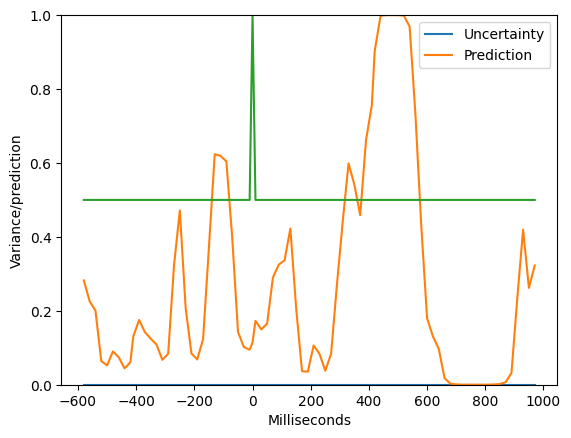

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


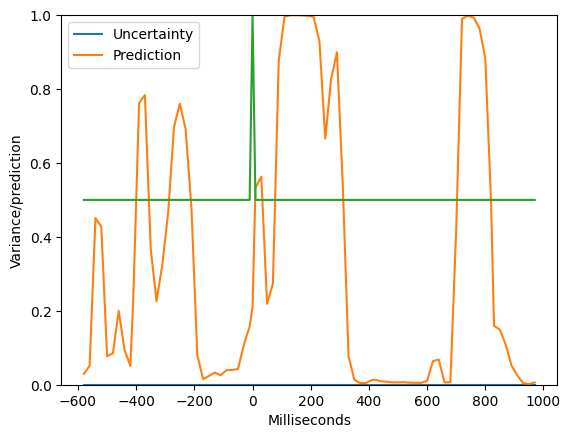

tensor(0)
tensor(1)


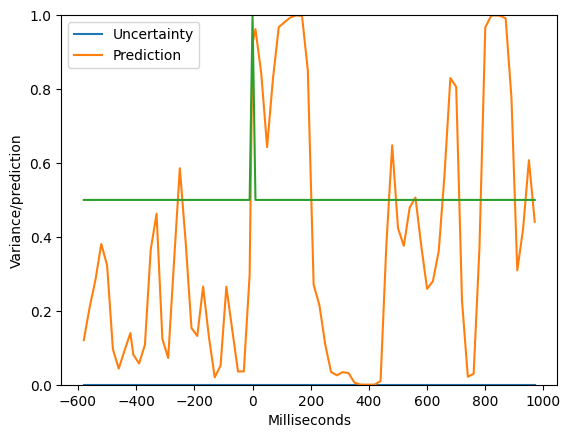

tensor(1)


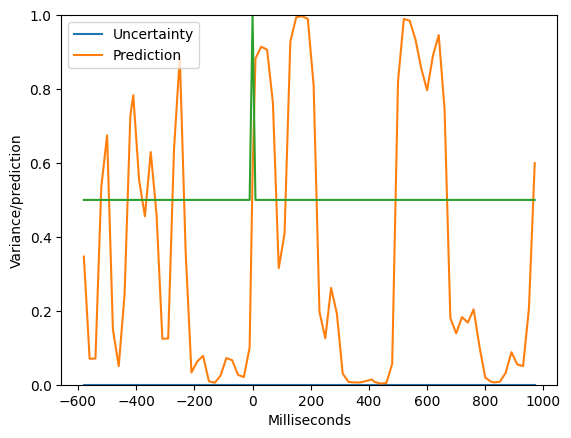

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


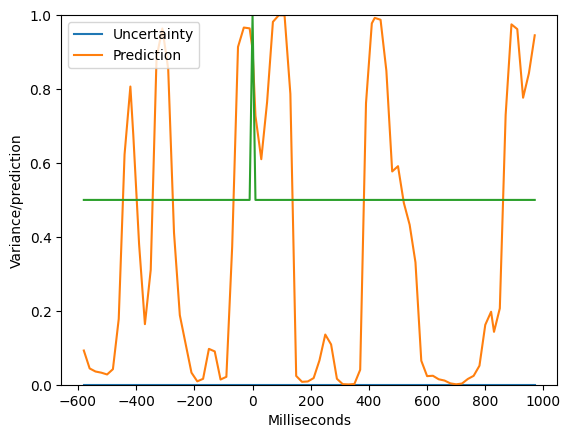

tensor(0)
tensor(0)
tensor(0)
tensor(1)


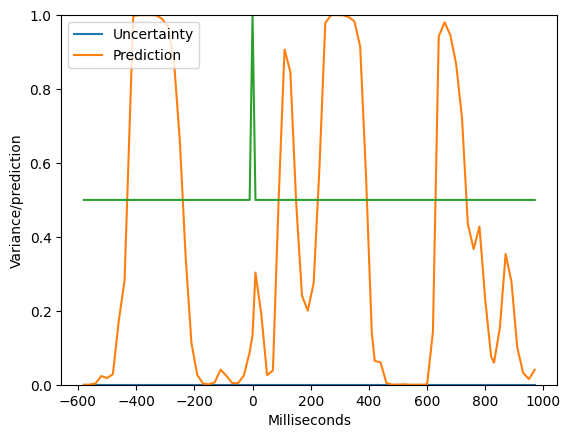

tensor(0)
tensor(1)


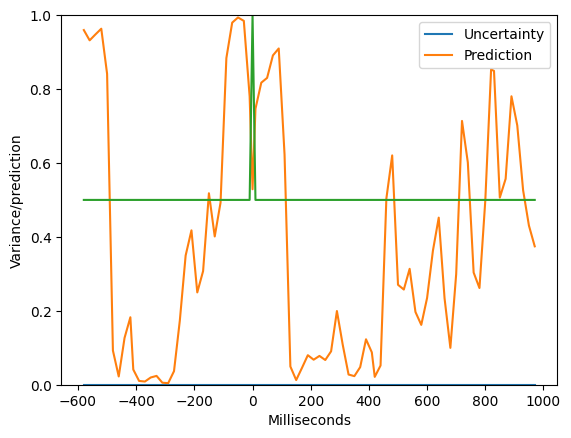

tensor(1)


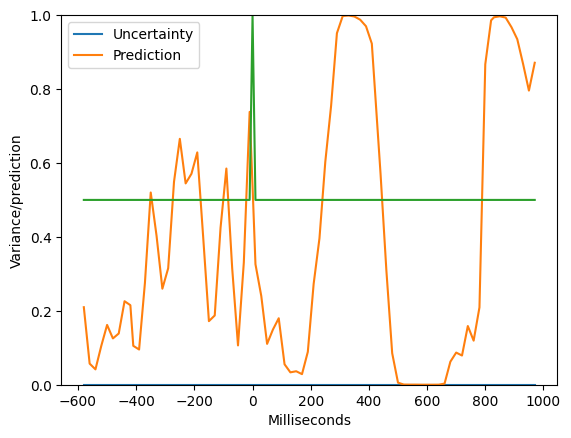

tensor(1)


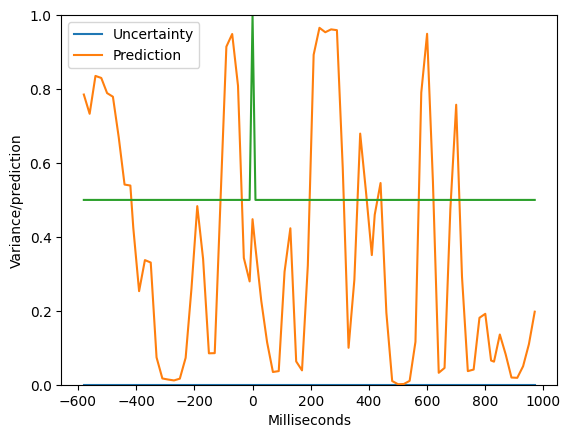

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


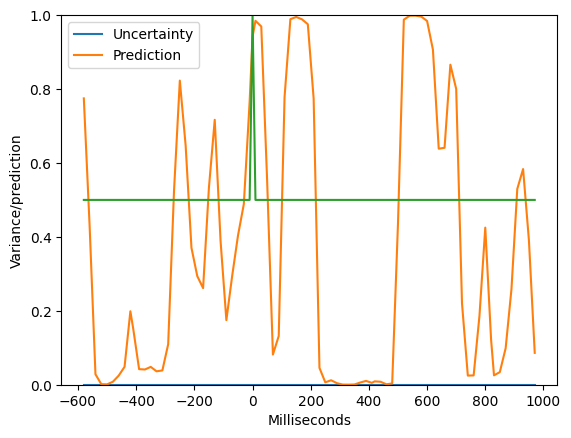

tensor(0)
tensor(0)


In [28]:
lower_window_ms = -600
upper_window_ms = 1000
lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling_interval )
upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling_interval )
event_index = 1


x = [samples_to_milliseconds(step) * undersampling_interval for step in range(lower_window, upper_window)]

# for event_index in range(len(event_indices[0])):
for event_index in range(50):
    y_true = 1 - (test_metrics_continuous.y_true[event_indices[0][event_index]])
    print(y_true)
    
    if not y_true:
        continue

    color = "green" if y_true else "red"

    plt.plot(x, test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Uncertainty")
    plt.plot(x, 1 - test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Prediction")

    plt.xlabel("Milliseconds")
    plt.ylabel("Variance/prediction")
    plt.legend()
    # plt.vlines([-50, 0, 50], ymin=0, ymax=1, color=[color])
    plt.plot(x, y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Truth")
    plt.ylim(0, 1)

    plt.show()

In [29]:
test_metrics_continuous.y_variance[~test_metrics_continuous.y_in_distribution].mean()

tensor(0., dtype=torch.float64)

In [30]:
test_metrics_continuous.y_variance[test_metrics_continuous.y_in_distribution].mean()

tensor(0., dtype=torch.float64)

In [31]:
def make_average_around_event(metrics, lower_window_ms, upper_window_ms, undersampling=undersampling_interval, y_to_plot=None, label_prefix=""):
    undersampling = undersampling * continues_true_rate

    lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling )
    upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling )


    x = [samples_to_milliseconds(step) * undersampling for step in range(lower_window, upper_window)]

    y_true_id = 1 - metrics.y_true.clone().double()
    y_true_id[~metrics.y_in_distribution] = 0.5
    
    event_indices = np.where(metrics.y_in_distribution.numpy())

    y_variances = []
    y_predictions = []
    y_trues = []
    y_subj = []
    for event_index in range(len(event_indices[0])):
        y_true = 1 - (metrics.y_true[event_indices[0][event_index]])
        # print(y_true)

        if y_to_plot != None and y_to_plot != y_true:
            continue

        color = "green" if y_true else "red"

        y_subj.append(metrics.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_variances.append(metrics.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_predictions.append(1 - metrics.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])

    
    
    stacked_subjects = torch.vstack(y_subj)
    stacked_variances = torch.vstack(y_variances)
    stacked_predictions = torch.vstack(y_predictions)
    stacked_trues = torch.vstack(y_trues)

    predictions_per_participant = []
    variances_per_participant = []
    trues_per_participant = []

    for i in range(1, 7):
        predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))

    avg_variances = torch.vstack(variances_per_participant).mean(axis=0)
    std_variances = torch.vstack(variances_per_participant).std(axis=0)

    avg_predictions = torch.vstack(predictions_per_participant).mean(axis=0)
    std_predictions = torch.vstack(predictions_per_participant).std(axis=0)

    avg_trues = torch.vstack(trues_per_participant).mean(axis=0)
    std_trues = torch.vstack(trues_per_participant).std(axis=0)



    plt.plot(x, avg_variances, label=f"{label_prefix}Uncertainty")
    plt.fill_between(x, avg_variances - std_variances, avg_variances + std_variances , label=f"_{label_prefix}Variances", alpha=0.1)


    plt.plot(x, avg_predictions, label=f"{label_prefix}Predictions")
    plt.fill_between(x, avg_predictions - std_predictions, avg_predictions + std_predictions , label=f"_{label_prefix}Predictions", alpha=0.1)

    plt.plot(x, avg_trues, label=f"{label_prefix}Truths")
    plt.fill_between(x, avg_trues - std_trues, avg_trues + std_trues , label=f"_{label_prefix}Truths", alpha=0.1)

    plt.legend()
    plt.xlabel("Time (ms)")
    plt.ylabel("Variance / prediction")
    plt.ylim(0, 1)

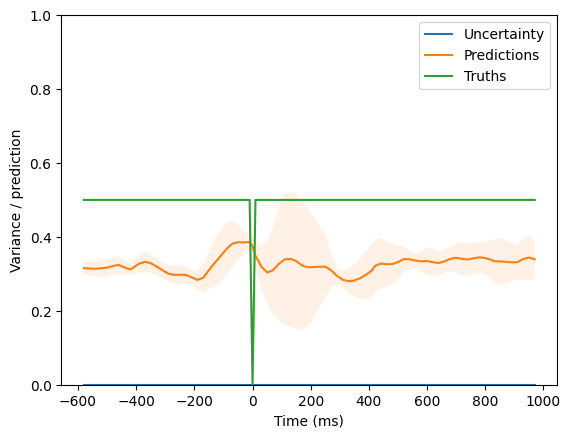

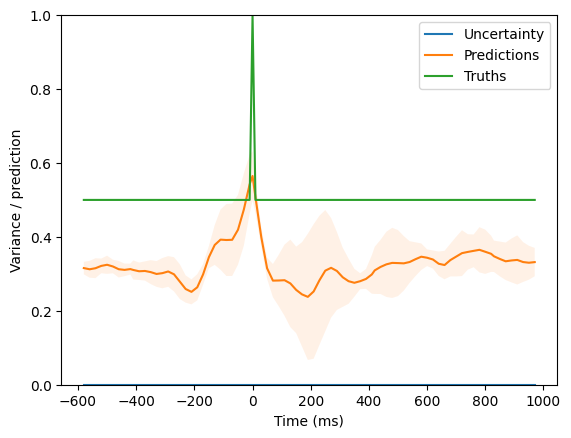

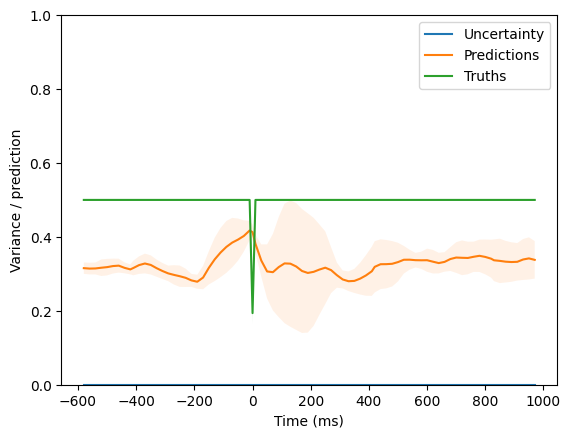

In [32]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0)
plt.legend()
plt.show()
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1)
plt.legend()
plt.show()
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = None)
plt.legend()
plt.show()



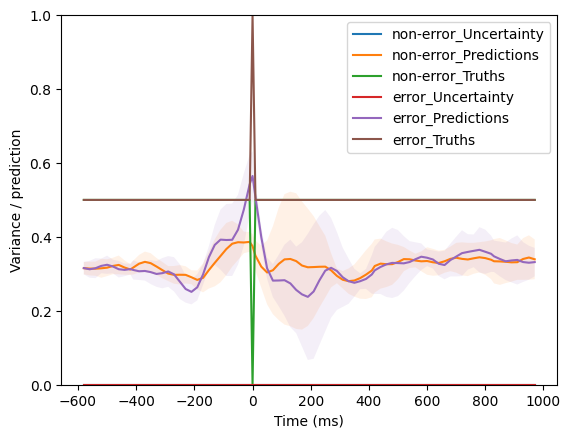

In [33]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0, label_prefix="non-error_")
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1, label_prefix="error_")
plt.legend()
plt.show()

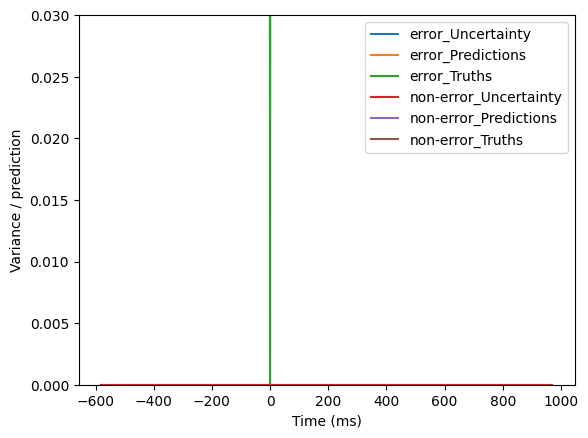

In [34]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0, label_prefix="error_")
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1,label_prefix="non-error_")
plt.legend()
plt.ylim(0.0, 0.03)
plt.show()

In [35]:
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 0, label_prefix="error ")
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 1, label_prefix="non-error ")
# plt.legend()
# plt.show()

In [36]:
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 0, label_prefix="error ")
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 1, label_prefix="non-error ")
# plt.legend()
# plt.ylim(0.004, 0.03)
# plt.show()

In [37]:
# make_average_around_event(test_metrics_continuous, -3000, 6000, y_to_plot = None)

In [38]:

y_variances = []
y_predictions = []
y_trues = []
y_subj = []
for event_index in range(len(event_indices[0])):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])

    color = "green" if y_true else "red"

    y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    
    y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])


In [39]:


stacked_subjects = torch.vstack(y_subj)
stacked_variances = torch.vstack(y_variances)
stacked_predictions = torch.vstack(y_predictions)
stacked_trues = torch.vstack(y_trues)

predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []

for i in range(1, 7):
    predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))

In [40]:
predictions_per_participant[0].reshape(-1).shape

torch.Size([35478])

In [41]:
predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []
y_in_distribution_per_participant  = []

for i in range(1, 7):
    predictions_per_participant.append(test_metrics_continuous.y_predicted[test_metrics_continuous.y_subj_idx == i])
    variances_per_participant.append(test_metrics_continuous.y_variance[test_metrics_continuous.y_subj_idx == i])
    trues_per_participant.append(test_metrics_continuous.y_true[test_metrics_continuous.y_subj_idx == i])
    y_in_distribution_per_participant.append(test_metrics_continuous.y_in_distribution[test_metrics_continuous.y_subj_idx == i])

In [42]:
predictions_per_participant[1].shape

torch.Size([95134])

Best Threshold=0.496307, G-Mean=0.801
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.01      0.72      0.01        94
           1       1.00      0.87      0.93     93145

    accuracy                           0.87     93239
   macro avg       0.50      0.80      0.47     93239
weighted avg       1.00      0.87      0.93     93239



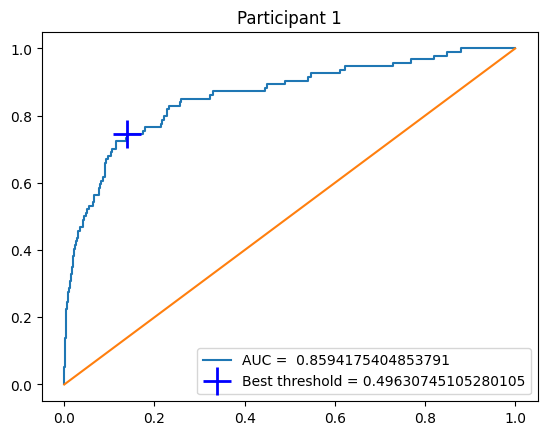

Best Threshold=0.412139, G-Mean=0.816
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.01      0.57      0.02        97
           1       1.00      0.95      0.97     95037

    accuracy                           0.95     95134
   macro avg       0.51      0.76      0.50     95134
weighted avg       1.00      0.95      0.97     95134



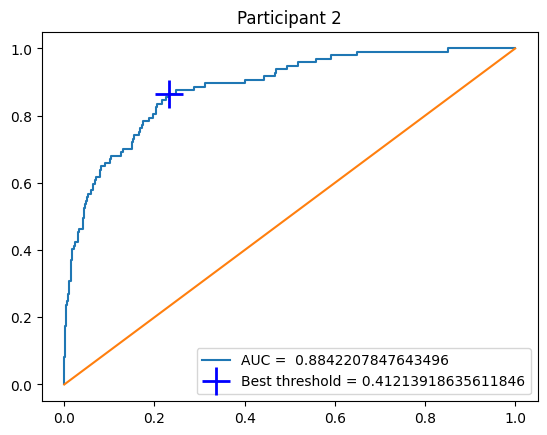

Best Threshold=0.441386, G-Mean=0.780
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.58      0.01        67
           1       1.00      0.87      0.93     93686

    accuracy                           0.87     93753
   macro avg       0.50      0.73      0.47     93753
weighted avg       1.00      0.87      0.93     93753



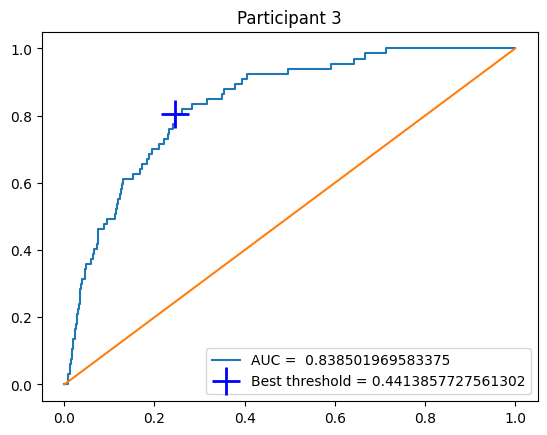

Best Threshold=0.437340, G-Mean=0.700
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.54      0.01        81
           1       1.00      0.85      0.92     92237

    accuracy                           0.85     92318
   macro avg       0.50      0.69      0.46     92318
weighted avg       1.00      0.85      0.92     92318



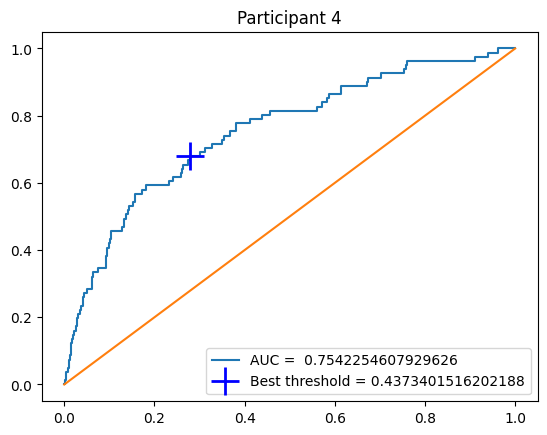

Best Threshold=0.445333, G-Mean=0.784
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.01      0.64      0.01        98
           1       1.00      0.90      0.95     92937

    accuracy                           0.90     93035
   macro avg       0.50      0.77      0.48     93035
weighted avg       1.00      0.90      0.95     93035



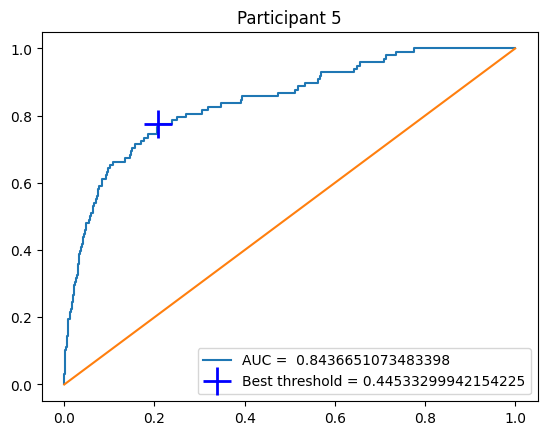

Best Threshold=0.284688, G-Mean=0.576
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.23      0.00        80
           1       1.00      0.77      0.87     92904

    accuracy                           0.77     92984
   macro avg       0.50      0.50      0.44     92984
weighted avg       1.00      0.77      0.87     92984



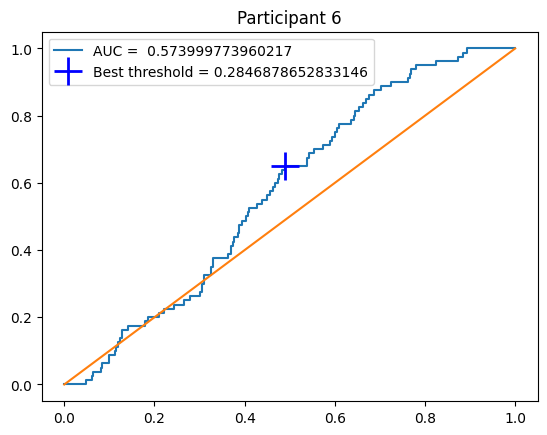

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

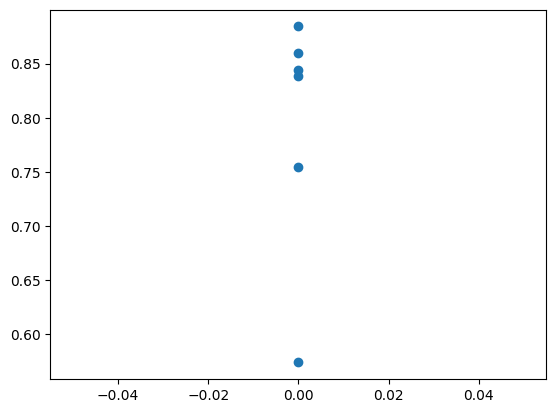

In [43]:
optimal_thresholds = []
interval_preds = []
interval_truths = []

aucs = []
avg_variances = []
for i, zipped in enumerate(zip(trues_per_participant, predictions_per_participant, y_in_distribution_per_participant)):
    participant_trues, participant_predictions, participan_in_distribution = zipped
    binarized_participant_trues = participant_trues.clone()
    fpr, tpr, thresholds = roc_curve(1 - binarized_participant_trues.reshape(-1), 1 - participant_predictions.reshape(-1))
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    print(f"Average variance: {variances_per_participant[i].mean()}")
    avg_variances.append(variances_per_participant[i].mean())
    aucs.append(auc(fpr, tpr))

    optimal_thresholds.append(thresholds[ix])
    
    
    thresholded_participant_predictions = participant_predictions > thresholds[ix]
    
    print(classification_report(binarized_participant_trues.reshape(-1), thresholded_participant_predictions.reshape(-1)))
    

    
    
    plt.plot(fpr, tpr, label=f"AUC =  {auc(fpr, tpr)}")
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
    plt.plot(fpr[ix], tpr[ix], 'b+', mew=2, ms=20, label=f"Best threshold = {thresholds[ix]}")
    plt.legend()
    plt.title(f"Participant {i +1}")
    plt.show()
    


plt.scatter(avg_variances, aucs)

m, b = np.polyfit(avg_variances, aucs, 1)

#use red as color for regression line
plt.plot(avg_variances, m*np.array(avg_variances)+b, color='red')
plt.xlabel("Average uncertainty")
plt.ylabel("AUC")
plt.show()

Participant 1
Average ID variance: 0.0
              precision    recall  f1-score   support

           0       0.54      0.72      0.62        94
           1       0.92      0.83      0.87       344

    accuracy                           0.81       438
   macro avg       0.73      0.78      0.75       438
weighted avg       0.84      0.81      0.82       438

Participant 2
Average ID variance: 0.0
              precision    recall  f1-score   support

           0       0.66      0.57      0.61        97
           1       0.88      0.92      0.90       348

    accuracy                           0.84       445
   macro avg       0.77      0.74      0.76       445
weighted avg       0.84      0.84      0.84       445

Participant 3
Average ID variance: 0.0
              precision    recall  f1-score   support

           0       0.28      0.58      0.38        67
           1       0.91      0.74      0.82       382

    accuracy                           0.72       449
   macro av

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

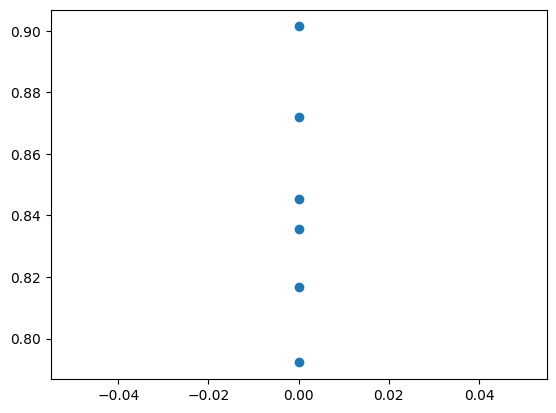

In [44]:
all_id_truths = []
all_id_preds = []

all_truths = []
all_preds = []

f1s = []
id_variances = []

for i, trues, predictions, y_in_distribution, threshold in zip(range(0, len(trues_per_participant)), trues_per_participant, predictions_per_participant, y_in_distribution_per_participant, optimal_thresholds):
    truths = trues[y_in_distribution].reshape(-1)
    preds = (predictions[y_in_distribution] > threshold).reshape(-1)
        
    print(f"Participant {i+1}")    
    print(f"Average ID variance: {variances_per_participant[i][y_in_distribution].mean()}")
    print(classification_report(truths.numpy(), preds.numpy()))
    f1s.append(f1_score(truths, preds))
    id_variances.append(variances_per_participant[i][y_in_distribution].mean())
    all_id_truths.append(truths)
    
    
    all_id_preds.append(preds)
    
    all_truths.append(trues.reshape(-1))
    all_preds.append((predictions > threshold).reshape(-1))
        
print("Averaged over all participants")        
print(classification_report(torch.hstack(all_id_truths).reshape(-1), torch.hstack(all_id_preds).reshape(-1)))
               
               
plt.scatter(id_variances, f1s)

m, b = np.polyfit(id_variances, f1s, 1)

plt.plot(id_variances, m*np.array(id_variances)+b, color='red')
plt.xlabel("Average ID uncertainty")
plt.ylabel("F1")
plt.show()


plt.scatter(avg_variances, f1s)

m, b = np.polyfit(avg_variances, f1s, 1)

plt.plot(avg_variances, m*np.array(avg_variances)+b, color='red')
plt.xlabel("Average ID+OOD uncertainty")
plt.ylabel("F1")
plt.show()


In [ ]:
stack_truths = torch.hstack(all_truths).reshape(-1).numpy()
print(1 - test_metrics_continuous.y_in_distribution.numpy().mean() * 0.2)
stack_truths = stack_truths.astype(bool)
stack_preds = torch.hstack(all_preds).reshape(-1).numpy()



In [ ]:
stack_truths.mean()

In [ ]:
print(stack_preds.reshape(int(512 / continues_true_rate), -1).max(axis=0).shape)
print(stack_preds.reshape(int(512 / continues_true_rate), -1).max(axis=0).mean())

In [ ]:
stack_truths.reshape(512, -1).min(axis=0).mean()

In [ ]:
torch.hstack(all_id_truths).reshape(-1).numpy()

In [ ]:
stack_truths.mean()

In [ ]:
stack_preds.mean()

In [ ]:
true_indices = np.where(~stack_truths)[0]
pred_indices = np.where(~stack_preds)[0]

nearest_true_indices = []
distances = []
for pred_index in range(len(stack_preds)):
    # print(pred_index)
    best_true_index = np.argmin(abs(true_indices - pred_index))
    # print(best_true_index)
    # print(true_indices[best_true_index], pred_index)
    nearest_true_indices.append(best_true_index)
    # distances.append(best_true_index)
nearest_true_indices = np.array(nearest_true_indices)

In [ ]:
distances

In [ ]:
plt.hist(list(map(samples_to_milliseconds, (nearest_true_indices[pred_indices] - pred_indices) * continues_true_rate)))

In [ ]:
distances = np.array(list(map(samples_to_milliseconds, (nearest_true_indices - range(len(stack_preds))) * continues_true_rate)))
print(max(np.abs(distances[~stack_preds])))
print(min(np.abs(distances[~stack_preds])))
print(np.mean(np.abs(distances[~stack_preds])))
print(np.mean(np.abs(distances[~stack_preds])))
print(np.sum(np.abs(distances[~stack_preds]) < 100)) # 110246 @ 1 vs @ 3 12088
print(np.sum(np.abs(distances[~stack_preds]) > 100)) # 95718  @ 1 vs @ 3 10263



In [ ]:
true_indices

In [ ]:
distances

In [ ]:
maximum_distance_to_tp = np.array(distances[:len(distances) - (len(distances) % milliseconds_to_samples(1000))]).reshape(milliseconds_to_samples(1000), -1).max(axis=0)

In [ ]:
plt.hist(maximum_distance_to_tp)

In [ ]:
stack_preds[: len(stack_preds) - (len(stack_preds) % milliseconds_to_samples(1000))].reshape(milliseconds_to_samples(1000), -1).max(axis=0).mean()

In [ ]:
np.where(stack_preds[: len(stack_preds) - (len(stack_preds) % milliseconds_to_samples(1000))].reshape(milliseconds_to_samples(1000), -1).max(axis=0))[0]

In [ ]:
x_range = range(0, 600)
FARs = [(maximum_distance_to_tp > i).mean() for i in x_range]

plt.plot(x_range, FARs)
plt.xlabel("Maximum allowable distance to positive onset in ms")
plt.ylabel("FAR")
plt.show()

In [ ]:
test_metrics_continuous.y_predicted - 2 * test_metrics_continuous.y_variance

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted[test_metrics_continuous.y_in_distribution], test_metrics_continuous.y_variance[test_metrics_continuous.y_in_distribution])
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted[~test_metrics_continuous.y_in_distribution], test_metrics_continuous.y_variance[~test_metrics_continuous.y_in_distribution])
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted, test_metrics_continuous.y_variance)
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:

names = [
    "400ms",
    "600ms", 
    "1000ms",
]
paths = [
    "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl",
    "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
]


for name, path in zip(names, paths):
    metrics = open_file_pickle(path)

    make_average_around_event(metrics, -600, 1000, y_to_plot = 0, label_prefix=f"non-error_{name}")
    # make_average_around_event(metrics, -600, 1000, y_to_plot = 1, label_prefix=f"error_{name}")
    # plt.legend()
    # plt.show()
plt.legend()
plt.show()

for name, path in zip(names, paths):
    metrics = open_file_pickle(path)

    # make_average_around_event(metrics, -600, 1000, y_to_plot = 0, label_prefix=f"non-error_{name}")
    make_average_around_event(metrics, -600, 1000, y_to_plot = 1, label_prefix=f"error_{name}")
    # plt.legend()
    # plt.show()
plt.legend()
plt.show()

In [ ]:
undersampling_interval = 10


paths = [
    "BCI_root/Results/metrics_Ensemble_CorreiaNet_continuous_[2022-12-06,10:21].pkl",
    "BCI_root/Results/metrics_NoStrideCorreiaNetEnsemble_continuous_[2022-12-07,11:37].pkl",
    "BCI_root/Results/metrics_BayesianCorreiaNet_continuous_[2022-12-06,12:24].pkl",
    "BCI_root/Results/metrics_Balanced20EnsembleCorreiaNet_continuous_[2022-12-06,19:55].pkl",
    "BCI_root/Results/metrics_UnbalancedBayesianCorreiaNet_continuous_[2022-12-06,13:03].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
    
    "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl",
    "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
    
    "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2022-12-06,10:47].pkl",
    "BCI_root/Results/metrics_20Ensemble_EEGNet_continuous_[2022-12-06,11:46].pkl",
    "BCI_root/Results/metrics_Unbalanced20EnsembleEEGNet_continuous_[2022-12-06,15:17].pkl",
    "BCI_root/Results/metrics_BayesianEEGNet_continuous_[2022-12-06,11:54].pkl",
    "BCI_root/Results/metrics_Proper_EEGNet_continuous_[2022-12-07,12:13].pkl",
    "BCI_root/Results/metrics_5ensembleProper_EEGNet_continuous_[2022-12-07,12:37].pkl",
    "BCI_root/Results/metrics_CrossEntropy5ensembleProper_EEGNet_continuous_[2022-12-07,14:52].pkl",
]




for path in paths[0:1]:

    metrics = open_file_pickle(path)
    
    plt.scatter(metrics.y_predicted, metrics.y_variance)
    plt.xlabel("predicted value")
    plt.ylabel("variance")
    plt.title(path)
    plt.show()